In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 讀入Fashion MNIST數據

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 看數據


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

這是 Trouser


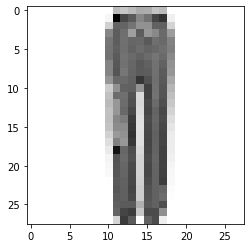

In [7]:
n = 1000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

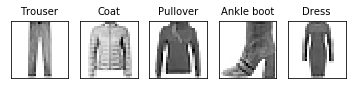

In [8]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[8] #test

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential()

#### <mark style=background-color:red>試試看如果dense層不是遞減的會怎麼樣->100層後接500層</mark> 

In [15]:
model.add(Dense(150,input_dim=784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

## 組裝神經網路

In [16]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 188,360
Trainable params: 188,360
Non-trainable params: 0
_________________________________________________________________


#### <mark style=background-color:red>batch_size改成88, epochs改成21</mark> 

In [17]:
one = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=88, epochs=21) #學習率和訓練次數做更動

Train on 60000 samples, validate on 10000 samples
Epoch 1/21
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0797 - accuracy: 0.3596 - val_loss: 0.0608 - val_accuracy: 0.5718
Epoch 2/21
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0475 - accuracy: 0.6633 - val_loss: 0.0411 - val_accuracy: 0.7167
Epoch 3/21
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0367 - accuracy: 0.7557 - val_loss: 0.0350 - val_accuracy: 0.7681
Epoch 4/21
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0316 - accuracy: 0.7951 - val_loss: 0.0311 - val_accuracy: 0.7944
Epoch 5/21
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0286 - accuracy: 0.8102 - val_loss: 0.0289 - val_accuracy: 0.8050
Epoch 6/21
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0269 - accuracy: 0.8201 - val_loss: 0.0276 - val_accuracy: 0.8128
Epoch 7/21
60000/60000 [=========================

In [18]:
result = model.predict_classes(x_test)

訓練成果

第幾筆:846
我的預測是： Sandal , 正確答案： Sandal


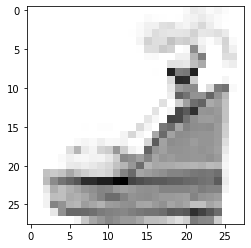

In [27]:
n = eval(input("第幾筆:"))

list=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
a=0
for i in range(0,9):
    if y_test[n][i]!=0:
        a=i
print('我的預測是：',list[result[n]],', 正確答案：',list[a])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys');

神經網路預測： 5


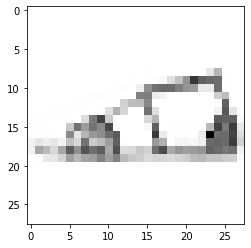

In [28]:
n=5781
print('神經網路預測：',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')